### Step 1: Set Up my Environment
Install required libraries:

In [34]:
# pip install pandas scikit-learn matplotlib seaborn streamlit

### Step 2: Load and Explore the Data

In [9]:
import pandas as pd 

In [10]:
# Load dataset
df = pd.read_csv('Heart_diseases.csv')

print(df.head()) # Look at the row

print(df.info()) # Check data info

print(df.isnull().sum()) # Check for missing values

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

### Step 3: Preprocess the Data
Encode categorical variables

Split into features and target

In [11]:
X = df.drop("target", axis=1)
Y = df["target"]

###  Step 4: Split Data into Train and Test Sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2,random_state=42
)


### Step 5: Train the Model
I used Random Forest (great baseline):

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


###  Step 6: Evaluate the Model
Print accuracy and confusion matrix:

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:2f}")

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.868852
[[26  3]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [16]:
import joblib

joblib.dump(model, "Heart_diseases_model.pkl")

['Heart_diseases_model.pkl']

### Step 7: Feature Importance
Show which features matter most:

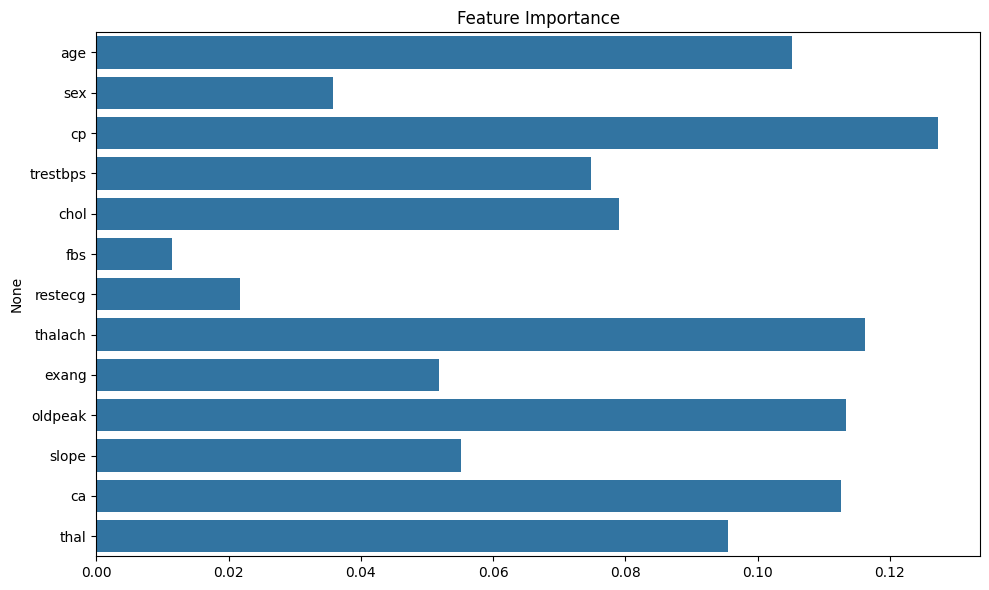

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get importance
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()

In [14]:
import joblib

joblib.dump(model, "Heart_diseases_model.pkl")

['Heart_diseases_model.pkl']

In [15]:
import joblib
model = joblib.load("Heart_diseases_model.pkl")
print(model)

RandomForestClassifier(random_state=42)
